In [1]:
%load_ext autoreload
%autoreload complete

In [3]:
from protest_impact.synthetic_region.hyperopt import get_study_df

df = get_study_df("test_1002")
df[
    [
        "method",
        "standardize",
        "use_autoregressor",
        "rmse_mean",
        "rmse_std",
        "random_post_diff_mean_week_1",
        "random_post_diff_mean",
        "protest_post_diff_mean_week_1",
        "protest_post_diff_mean",
    ]
].sort_values("rmse_mean")

,method,standardize,use_autoregressor,rmse_mean,rmse_std,random_post_diff_mean_week_1,random_post_diff_mean,protest_post_diff_mean_week_1,protest_post_diff_mean
1,socioeconomic_weights,False,NaN,1.232105,6.933929,-0.203502,-0.079713,-0.124000,-0.032221
16,socioeconomic_weights,False,NaN,1.232105,6.933929,-0.203502,-0.079713,-0.124000,-0.032221
4,socioeconomic_weights,False,NaN,1.232105,6.933929,-0.203502,-0.079713,-0.124000,-0.032221
10,socioeconomic_weights,False,NaN,1.232105,6.933929,-0.203502,-0.079713,-0.124000,-0.032221
27,linear_regression,False,True,1.236946,8.829016,-0.258732,-0.073338,-0.084445,-0.100078
2,linear_regression,False,True,1.236946,8.829016,-0.258732,-0.073338,-0.084445,-0.100078
7,distance_weights,False,NaN,1.241797,7.406896,-0.229895,-0.097344,-0.092213,-0.028899
8,distance_weights,False,NaN,1.241797,7.406896,-0.229895,-0.097344,-0.092213,-0.028899
5,socioeconomic_weights,False,NaN,1.242261,7.196686,-0.204567,-0.070387,-0.118241,-0.033603
15,socioeconomic_weights,False,NaN,1.242261,7.196686,-0.204567,-0.070387,-0.118241,-0.033603


<Axes: >

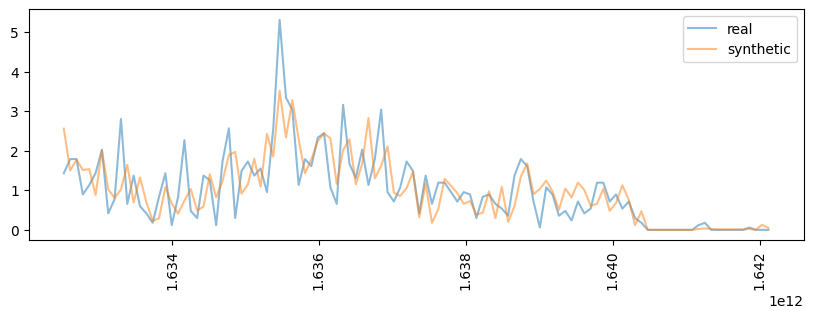

In [4]:
import json

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

from protest_impact.data.discourse.visual import plot_comparison

df0 = pd.DataFrame(json.loads(df["dfs_random"].iloc[0][15]))
plot_comparison(df0)

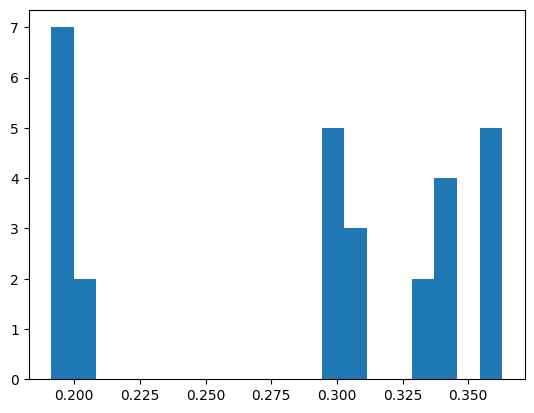

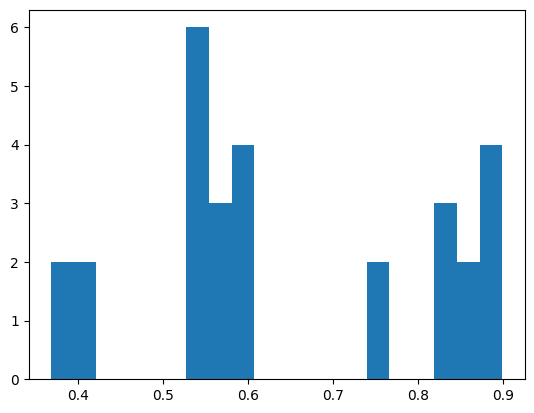

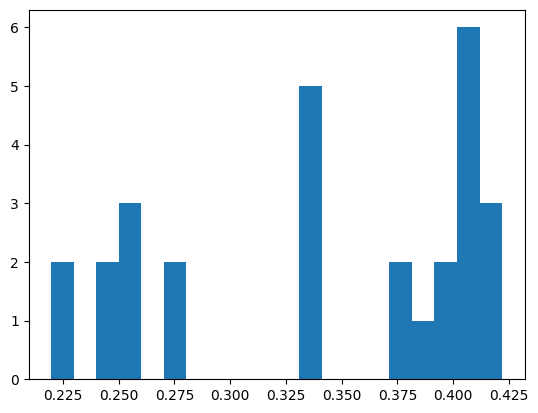

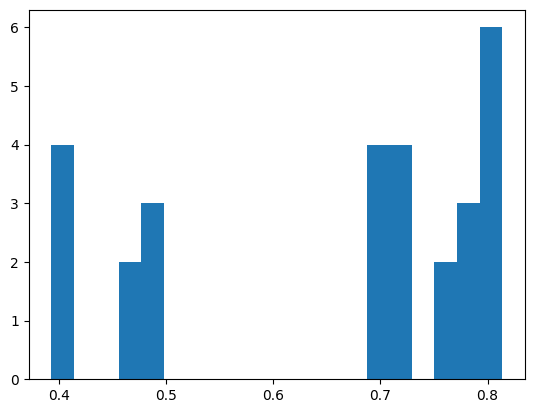

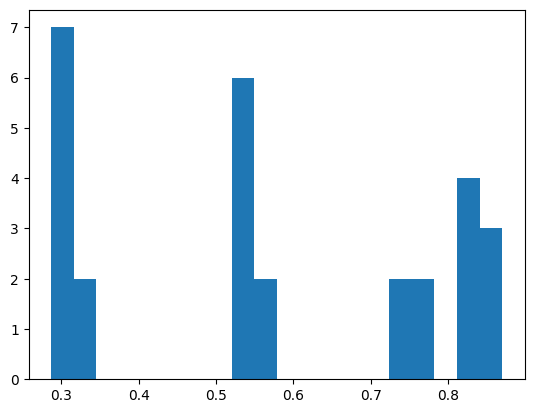

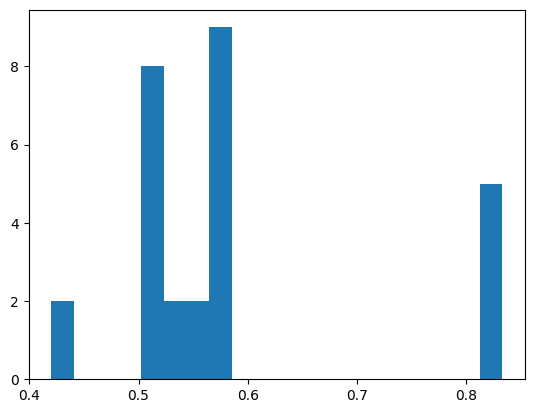

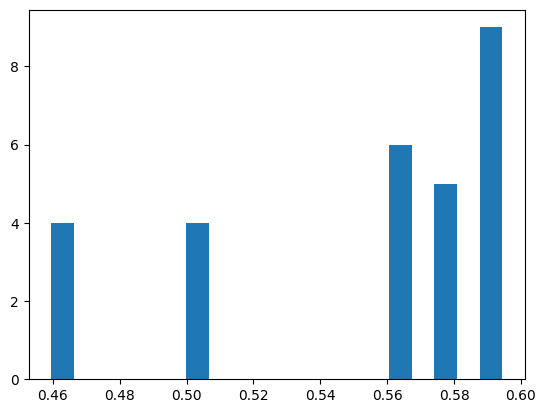

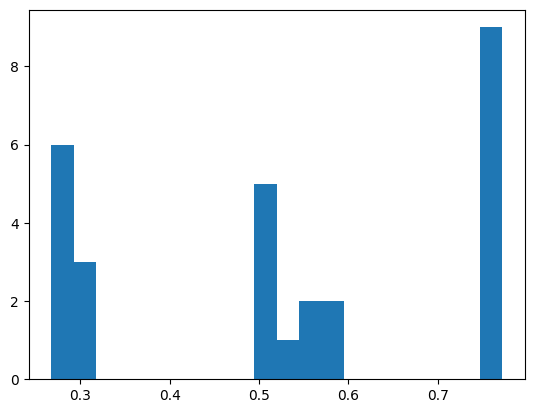

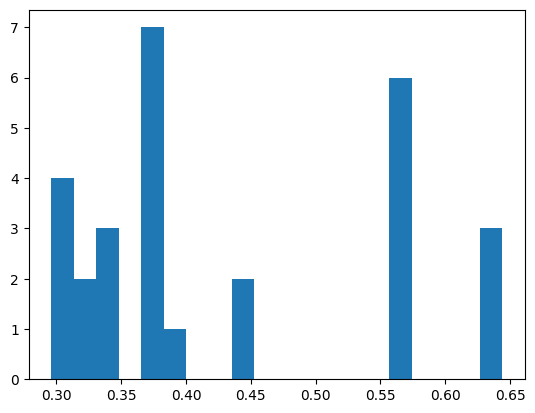

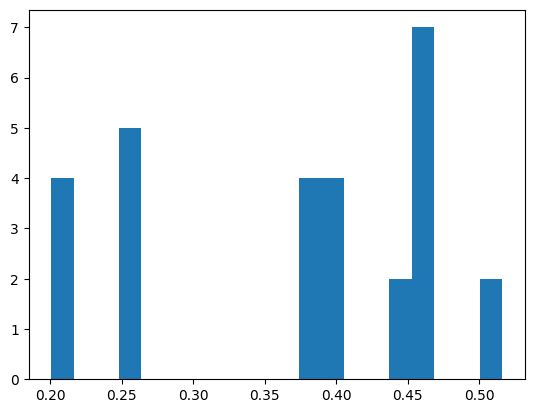

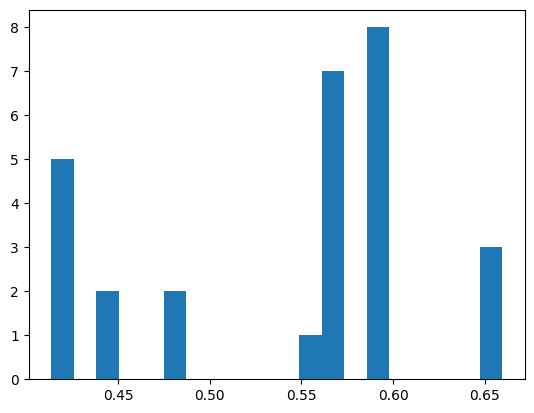

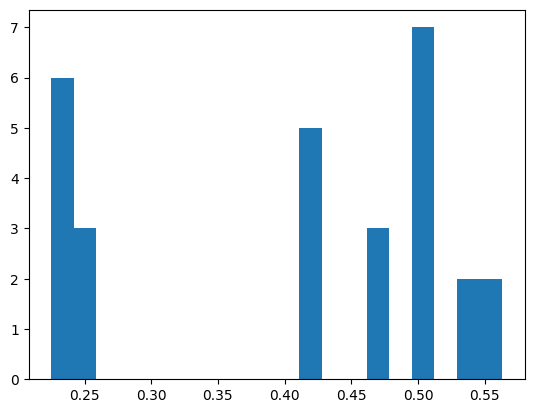

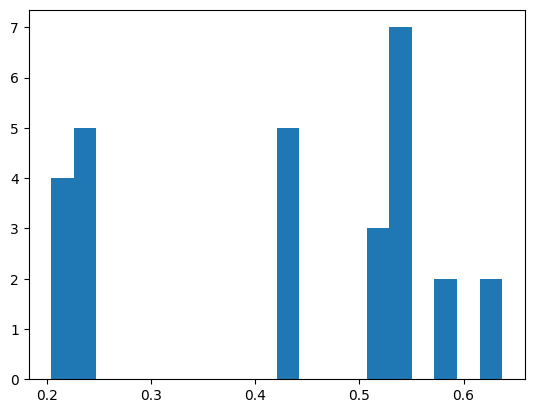

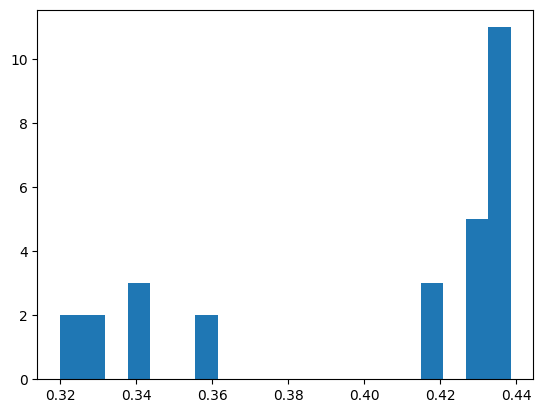

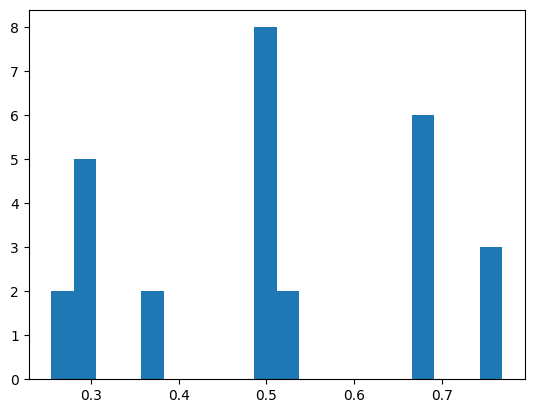

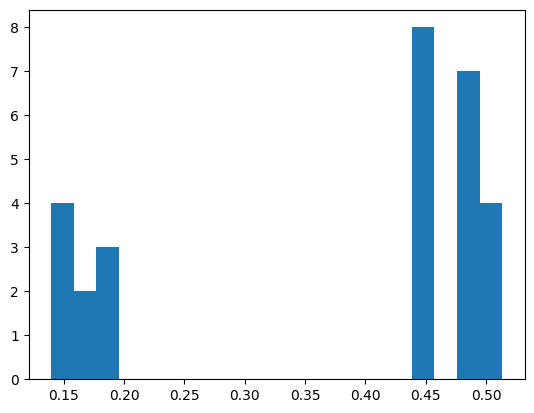

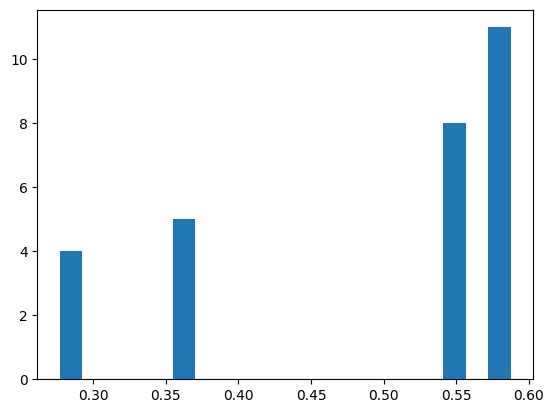

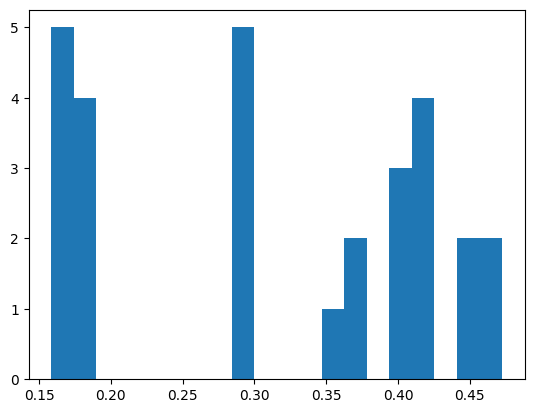

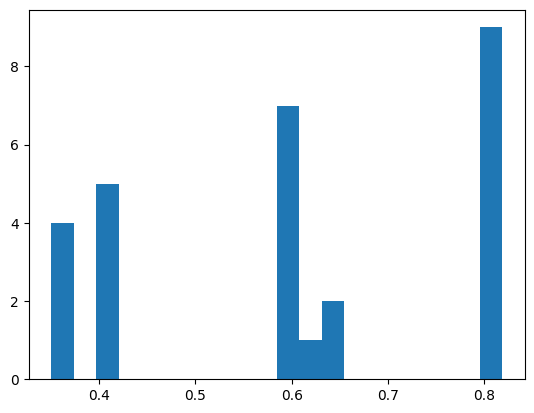

In [5]:
import matplotlib.pyplot as plt

for j in range(19):
    rmse_random = [
        np.sqrt(mean_squared_error(df0["real"], df0["synth"]))
        for df0 in [
            pd.DataFrame(json.loads(df["dfs_protest"].iloc[i][j]))
            for i in range(len(df))
        ]
    ]
    plt.hist(rmse_random, bins=20)
    plt.show()

In [6]:
mean_rmse_random = [
    np.mean(
        [
            np.sqrt(mean_squared_error(df0["real"], df0["synth"]))
            for df0 in [
                pd.DataFrame(json.loads(df["dfs_random"].iloc[i][j]))
                for i in range(len(df))
            ]
        ]
    )
    for j in range(19)
]
mean_rmse_protest = [
    np.mean(
        [
            np.sqrt(mean_squared_error(df0["real"], df0["synth"]))
            for df0 in [
                pd.DataFrame(json.loads(df["dfs_protest"].iloc[i][j]))
                for i in range(len(df))
            ]
        ]
    )
    for j in range(19)
]
np.mean(mean_rmse_random), np.mean(mean_rmse_protest)

(1.2126456861845352, 0.47503426426996265)

In [13]:
from protest_impact.data.protests import get_climate_protests

protests = get_climate_protests(groups=["fff", "alg", "xr", "eg"])

In [14]:
protests.admin1.value_counts()

Nordrhein-Westfalen    190
Bayern                 132
Berlin                 131
Niedersachsen           95
Hamburg                 55
Hessen                  44
Schleswig-Holstein      37
Rheinland-Pfalz         29
Sachsen                 29
Saarland                 7
Name: admin1, dtype: int64

In [8]:
region_weights = dict(protests.admin1.value_counts())
region_weights

{'Nordrhein-Westfalen': 135,
 'Bayern': 96,
 'Niedersachsen': 77,
 'Hessen': 31,
 'Schleswig-Holstein': 29,
 'Rheinland-Pfalz': 28,
 'Berlin': 25,
 'Hamburg': 22,
 'Sachsen': 16,
 'Saarland': 7}

In [17]:
from protest_impact.data.protests.random import get_random_events

random_events = get_random_events(1000, region_weights=region_weights)

_Adding this to hyperopt.py._

In [2]:
from protest_impact.synthetic_region.hyperopt import get_study_df

df = get_study_df("test_1003")
df[
    [
        "method",
        "standardize",
        "use_autoregressor",
        "socioeconomic_method",
        "rmse_mean",
        "rmse_std",
        "random_post_diff_mean_week_1",
        "random_post_diff_mean",
        "protest_post_diff_mean_week_1",
        "protest_post_diff_mean",
    ]
].sort_values("rmse_mean")

,method,standardize,use_autoregressor,socioeconomic_method,rmse_mean,rmse_std,random_post_diff_mean_week_1,random_post_diff_mean,protest_post_diff_mean_week_1,protest_post_diff_mean
28,linear_regression,True,False,NaN,0.498109,0.174058,-0.003124,0.029736,-0.137753,-0.067510
19,linear_regression,False,False,NaN,0.498109,0.174058,-0.003124,0.029736,-0.137753,-0.067510
24,linear_regression,False,False,NaN,0.498109,0.174058,-0.003124,0.029736,-0.137753,-0.067510
29,linear_regression,True,False,NaN,0.503821,0.187647,-0.037674,0.005137,-0.117930,-0.072768
32,linear_regression,False,False,NaN,0.503821,0.187647,-0.037674,0.005137,-0.117930,-0.072768
36,linear_regression,True,True,NaN,0.512412,0.214030,-0.030398,0.007191,-0.084445,-0.100078
34,linear_regression,False,True,NaN,0.512412,0.214030,-0.030398,0.007191,-0.084445,-0.100078
3,linear_regression,False,True,NaN,0.512412,0.214030,-0.030398,0.007191,-0.084445,-0.100078
4,distance_weights,False,NaN,NaN,0.525590,0.177322,0.005516,0.006574,-0.092213,-0.028899
12,distance_weights,False,NaN,NaN,0.525590,0.177322,0.005516,0.006574,-0.092213,-0.028899


In [8]:
import json

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

mean_rmse_random = [
    np.mean(
        [
            np.sqrt(mean_squared_error(df0["real"], df0["synth"]))
            for df0 in [
                pd.DataFrame(json.loads(df["dfs_random"].iloc[i][j]))
                for i in range(len(df))
            ]
        ]
    )
    for j in range(19)
]
mean_rmse_protest = [
    np.mean(
        [
            np.sqrt(mean_squared_error(df0["real"], df0["synth"]))
            for df0 in [
                pd.DataFrame(json.loads(df["dfs_protest"].iloc[i][j]))
                for i in range(len(df))
            ]
        ]
    )
    for j in range(19)
]
np.mean(mean_rmse_random), np.mean(mean_rmse_protest)

(0.4937321236113214, 0.5147671382427936)

This seems very reasonable.

0.5135315493164023 0.1279957828511789


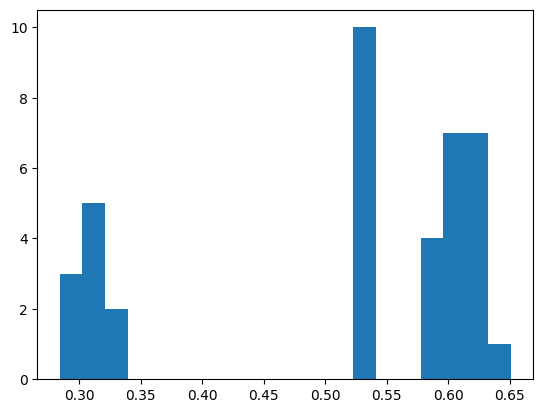

0.6043703566869577 0.2104715455978043


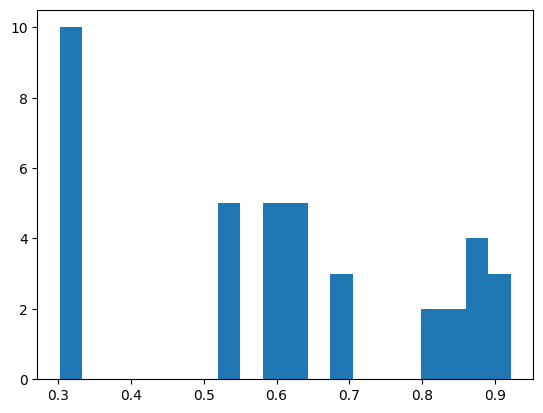

0.3214406700918612 0.14260577303590405


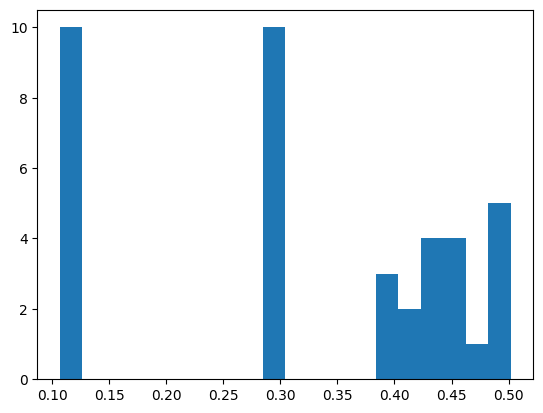

0.5951681009995241 0.1931527175892925


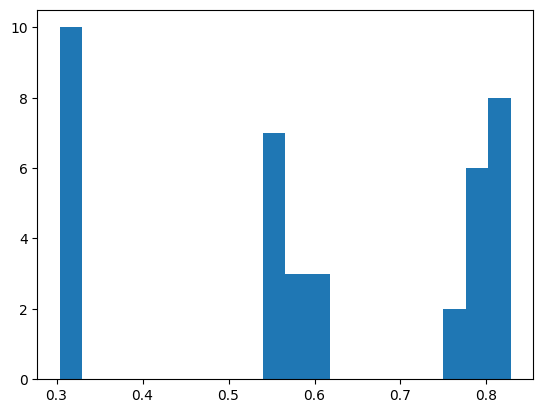

0.4966120036995964 0.17775274377823144


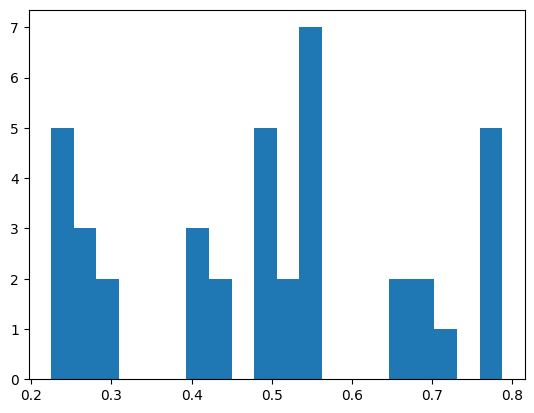

0.5241543234108008 0.14217527084899734


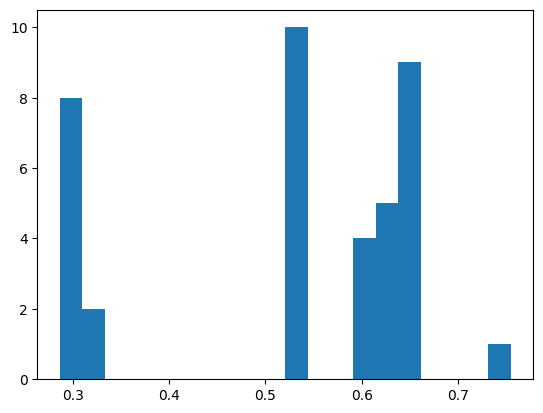

0.4151759162908208 0.1844127308363929


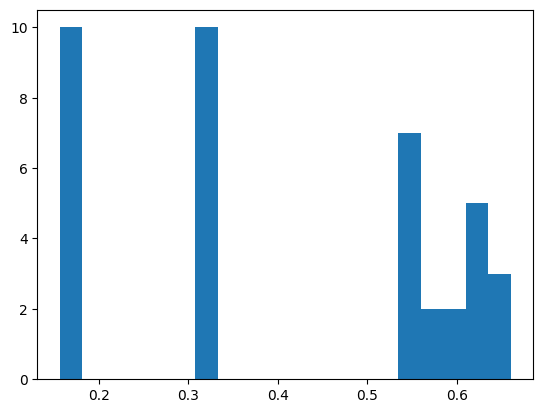

0.5898341409289828 0.19464743502374823


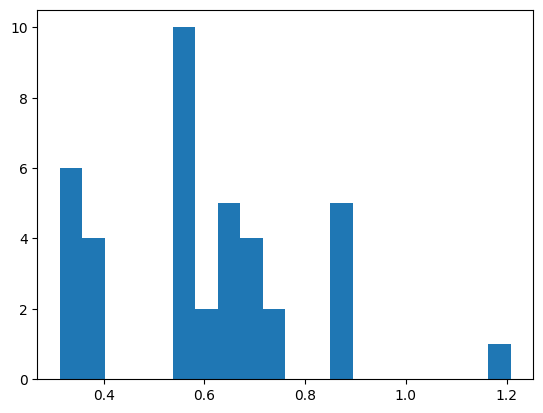

0.3864396285430583 0.15968130119801188


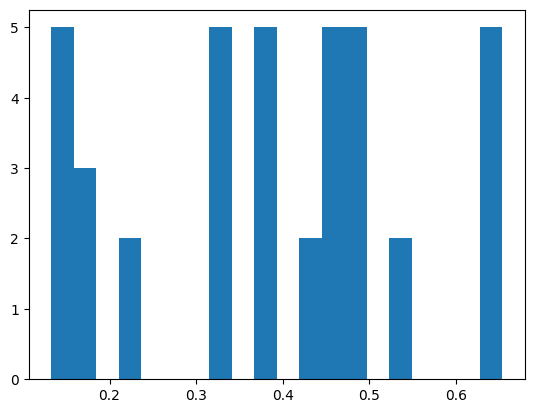

0.4558489754541852 0.17478366736527573


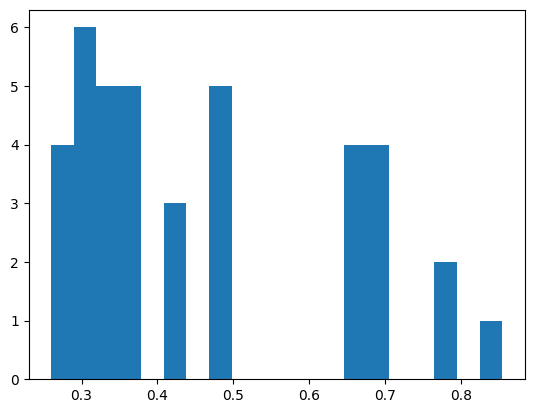

0.39897743281469505 0.09769634145824876


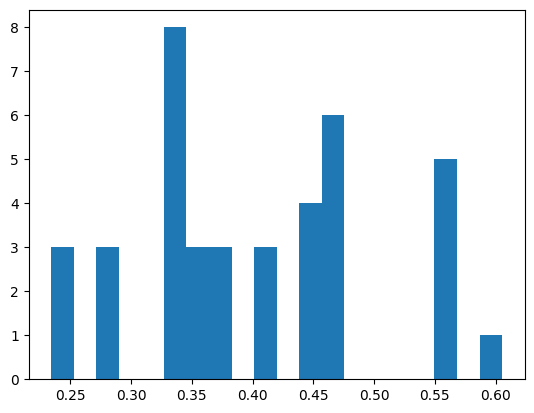

0.37803711764402137 0.1320989735720379


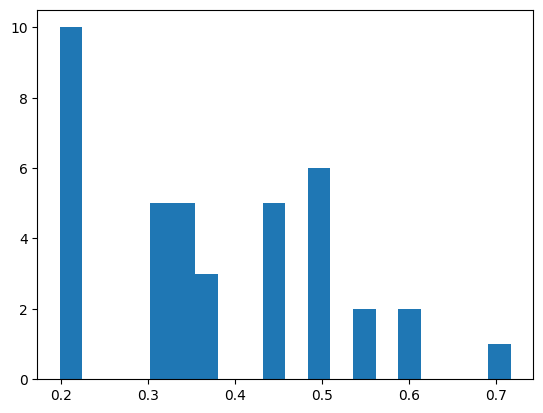

0.679275817043163 0.11781996673228137


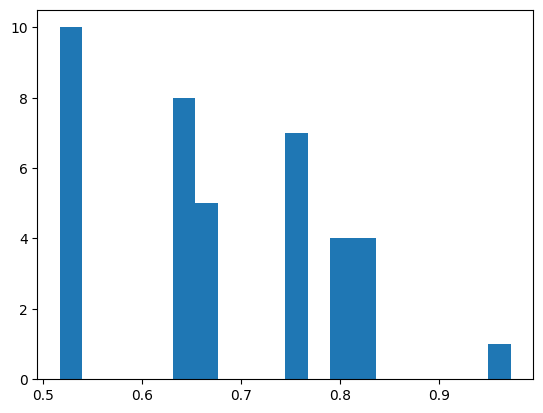

0.5350506858489467 0.20273454791037793


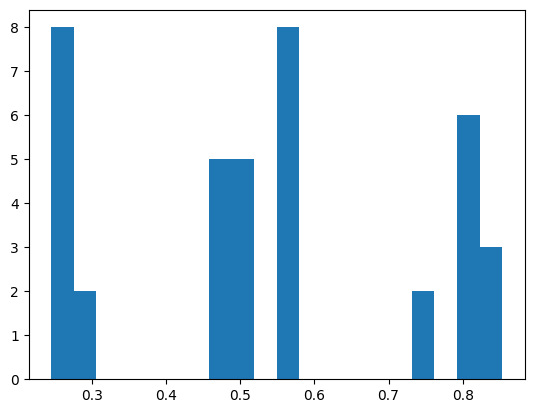

0.3970617091543445 0.11422918633403849


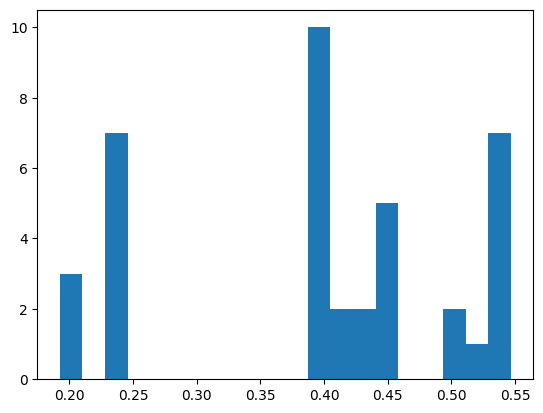

0.5290775503938411 0.21986886222737342


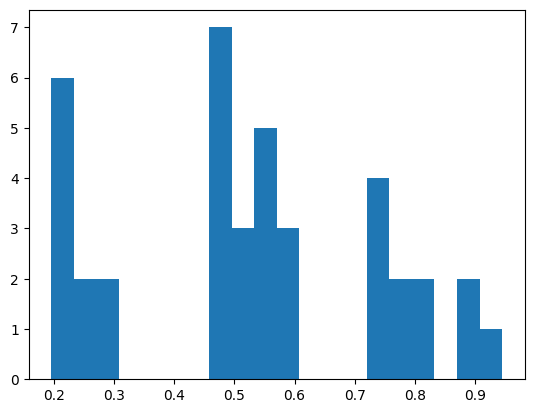

0.49427185970784177 0.13269392167939306


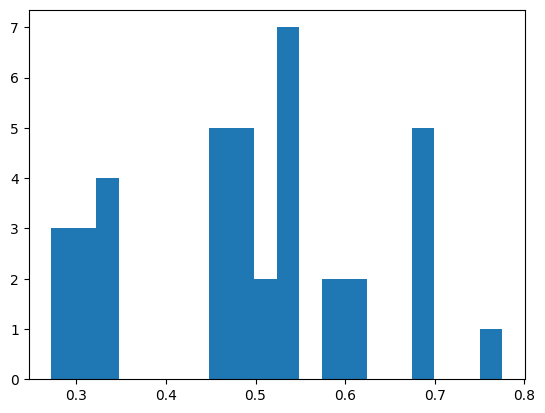

0.4741735468686713 0.11080639610737046


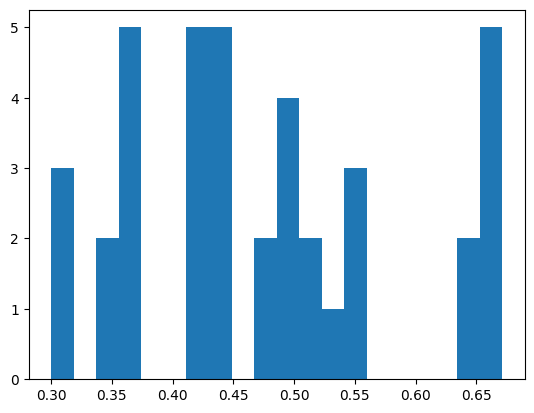

0.592408963717391 0.1788263106646157


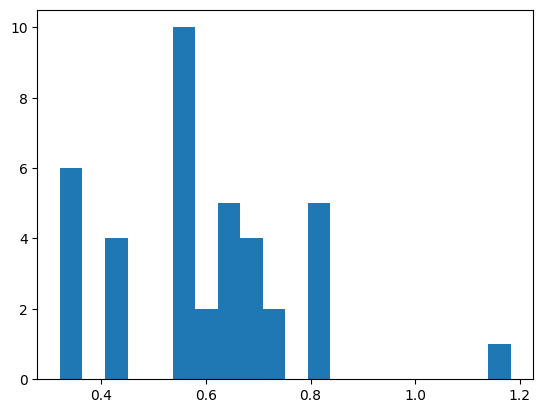

In [10]:
import matplotlib.pyplot as plt

# plot the distribution of rmse across dfs for each method
from protest_impact.data.discourse.visual import plot_comparison

for j in range(19):
    rmse_random = [
        np.sqrt(mean_squared_error(df0["real"], df0["synth"]))
        for df0 in [
            pd.DataFrame(json.loads(df["dfs_random"].iloc[i][j]))
            for i in range(len(df))
        ]
    ]
    print(np.mean(rmse_random), np.std(rmse_random))
    plt.hist(rmse_random, bins=20)
    plt.show()

Now fixing normalization at the end.

In [33]:
from protest_impact.synthetic_region.hyperopt import get_study_df

df = get_study_df("test_1004")
df[
    [
        "method",
        "standardize",
        "use_autoregressor",
        "socioeconomic_method",
        "rmse_mean",
        "rmse_std",
        "random_post_diff_mean_week_1",
        "random_post_diff_mean",
        "protest_post_diff_mean_week_1",
        "protest_post_diff_mean",
    ]
].sort_values("rmse_mean")

,method,standardize,use_autoregressor,socioeconomic_method,rmse_mean,rmse_std,random_post_diff_mean_week_1,random_post_diff_mean,protest_post_diff_mean_week_1,protest_post_diff_mean
30,linear_regression,False,False,NaN,0.522226,0.212318,0.007644,0.055594,-0.162375,-0.075675
8,linear_regression,True,False,NaN,0.522226,0.212318,0.007644,0.055594,-0.162375,-0.075675
18,linear_regression,True,False,NaN,0.522226,0.212318,0.007644,0.055594,-0.162375,-0.075675
16,linear_regression,True,False,NaN,0.527303,0.215937,-0.034379,0.020021,-0.166254,-0.097771
28,linear_regression,False,False,NaN,0.527303,0.215937,-0.034379,0.020021,-0.166254,-0.097771
23,linear_regression,False,True,NaN,0.543739,0.243644,-0.042434,0.006672,-0.152724,-0.142418
21,linear_regression,True,True,NaN,0.543739,0.243644,-0.042434,0.006672,-0.152724,-0.142418
5,linear_regression,True,False,NaN,0.555172,0.287634,0.004865,0.071595,-0.167169,-0.075419
24,linear_regression,False,False,NaN,0.555172,0.287634,0.004865,0.071595,-0.167169,-0.075419
26,linear_regression,True,False,NaN,0.559000,0.290492,-0.038848,0.038744,-0.164677,-0.097990


In [12]:
df0 = pd.DataFrame(json.loads(df["dfs_protest"].iloc[0][15]))
df0["date"] = pd.to_datetime(df0["date"], unit="ms")
df0

,date,real,synth
-84,2021-09-10,1.546961,1.034204
-83,2021-09-11,0.773481,1.033009
-82,2021-09-12,0.618785,1.412826
-81,2021-09-13,1.392265,1.727153
-80,2021-09-14,0.928177,1.121559
...,...,...,...
23,2021-12-26,0.000000,0.000000
24,2021-12-27,0.000000,0.000000
25,2021-12-28,0.000000,0.000000
26,2021-12-29,0.000000,0.000000


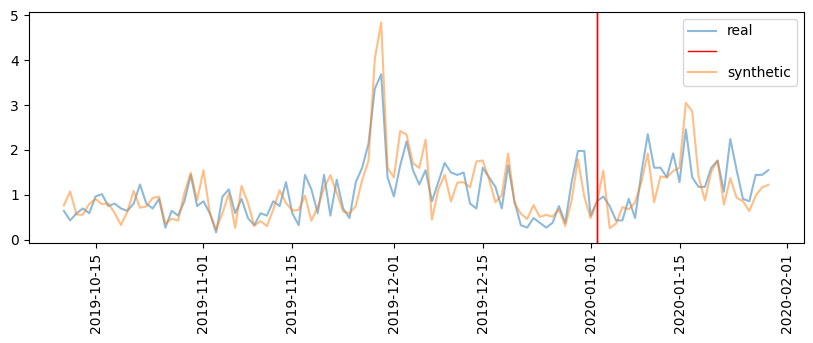

0.4750076637681489 0.08873398802500002


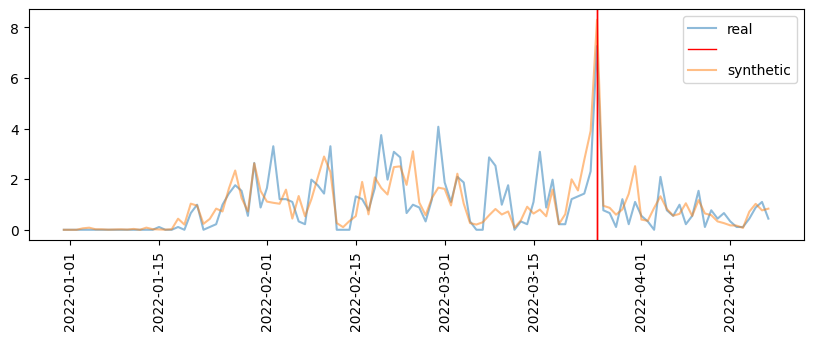

0.5408650907066302 -0.1581849066357143


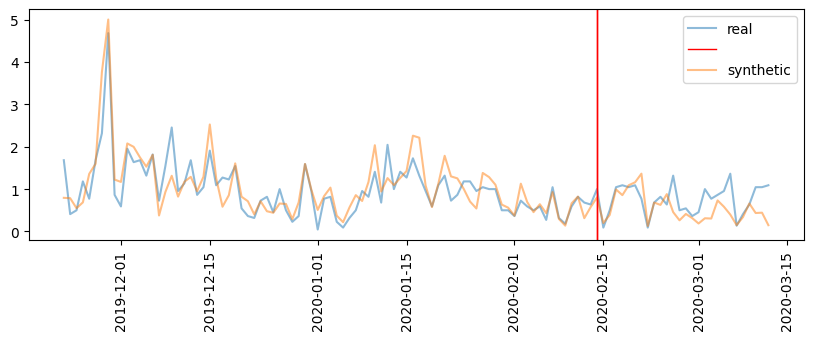

0.4169410841021542 0.21580121566785718


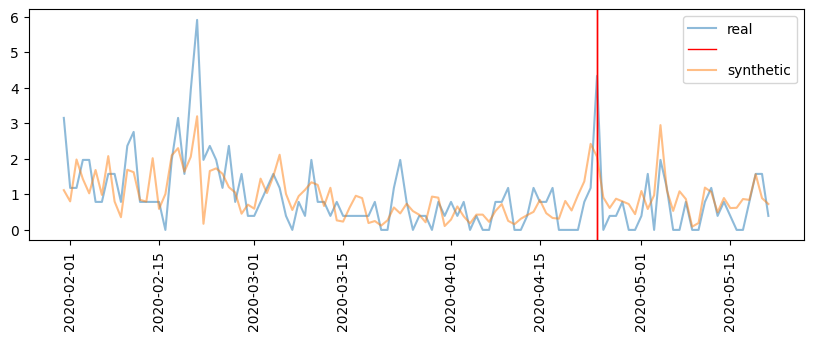

0.7046872869073306 -0.21589154869285712


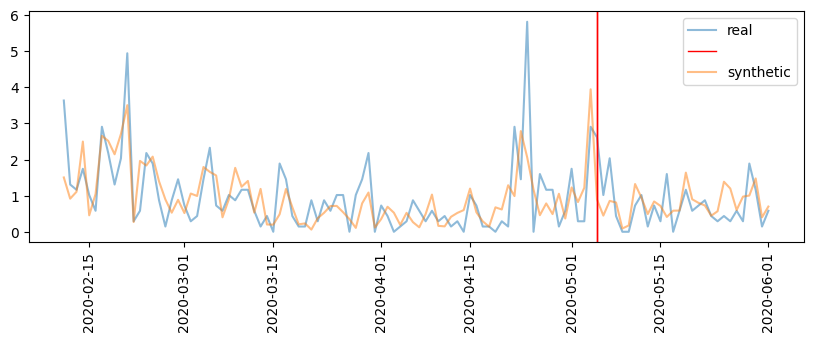

0.6230977241263995 -0.04792752014285713


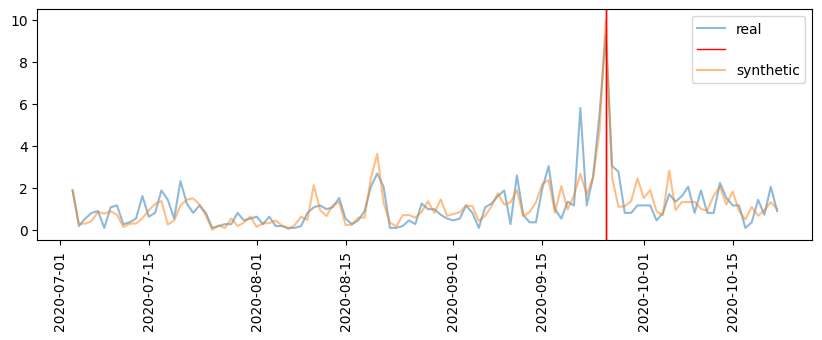

0.6772391663121691 -0.07983955248214289


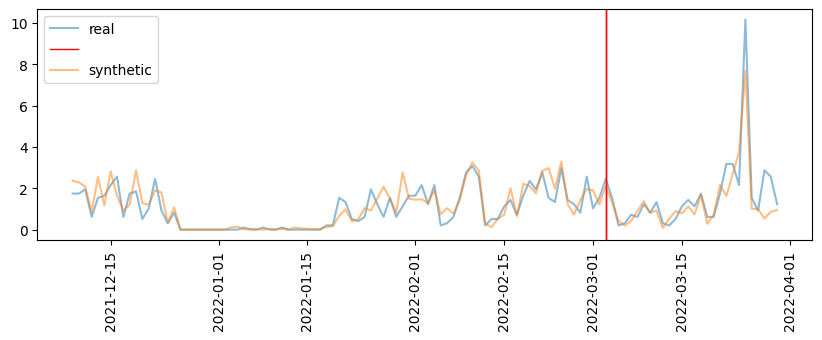

0.8796533333536022 0.3167991772678572


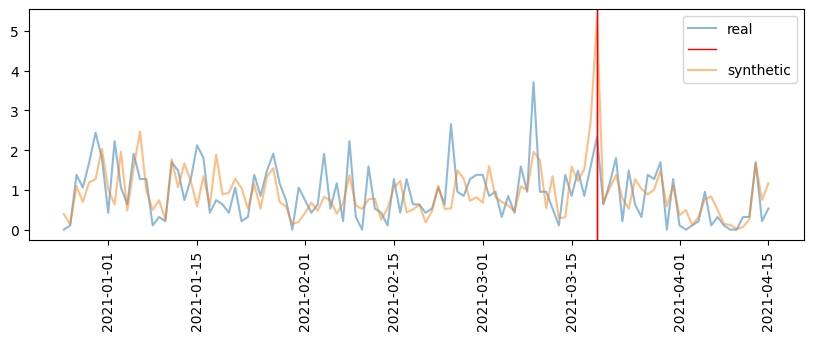

0.6939821086030232 -0.1938283113928571


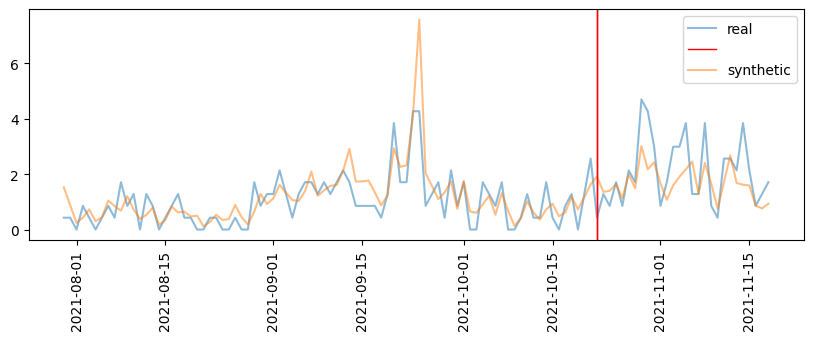

1.0070318204218196 0.38271412190714293


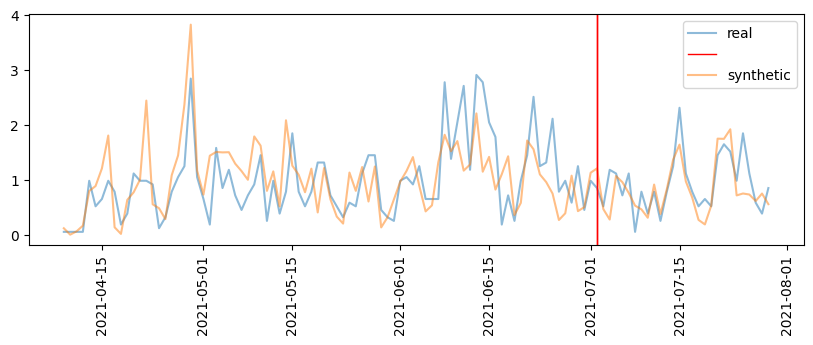

0.3857849103036764 0.09670903405714289


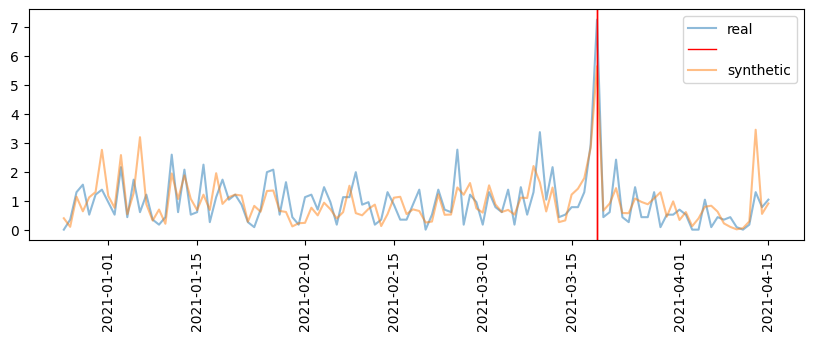

0.6530175932090513 -0.09555879569999999


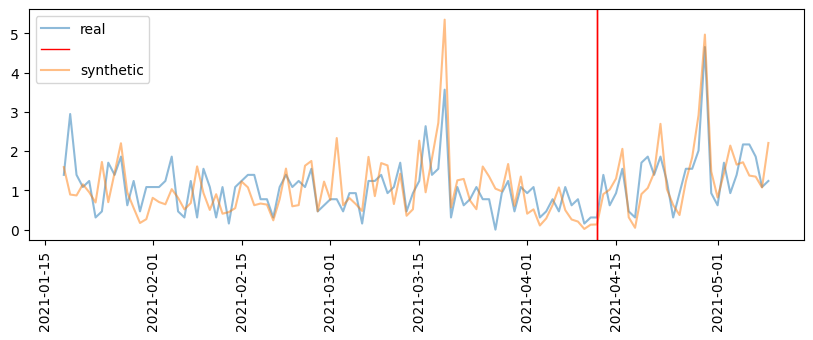

0.5489581210597891 -0.04893969813214277


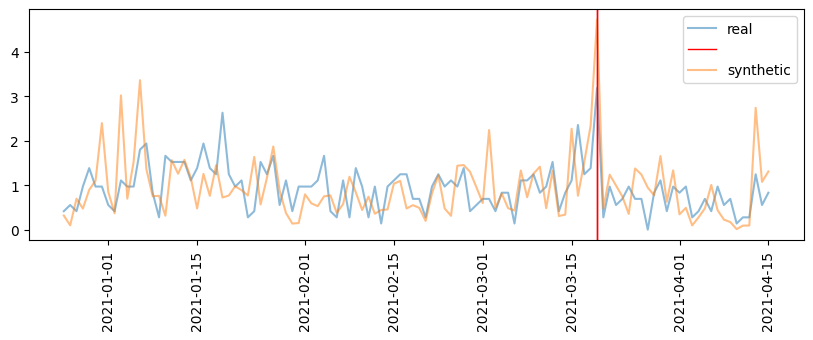

0.5848463178777045 -0.17241020390714284


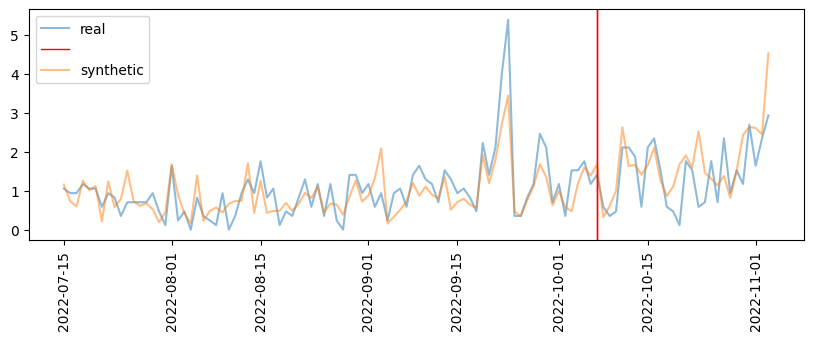

0.7507295322338216 -0.3091588633821428


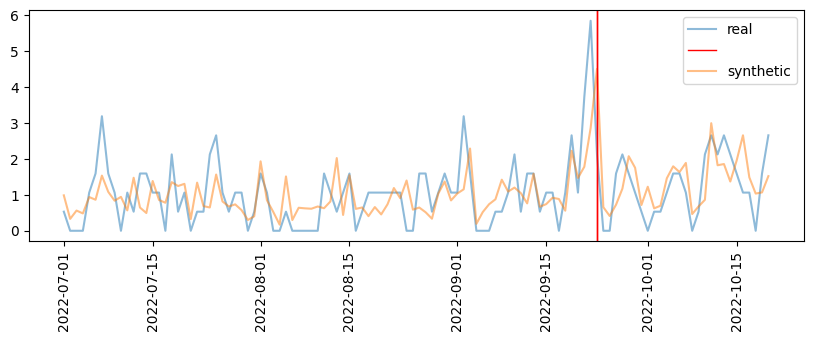

0.8423624597443848 -0.19709063120000006


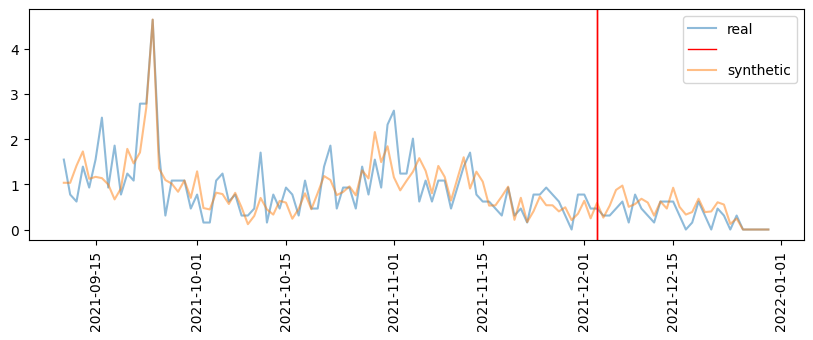

0.2123144988031992 -0.13355283341071428


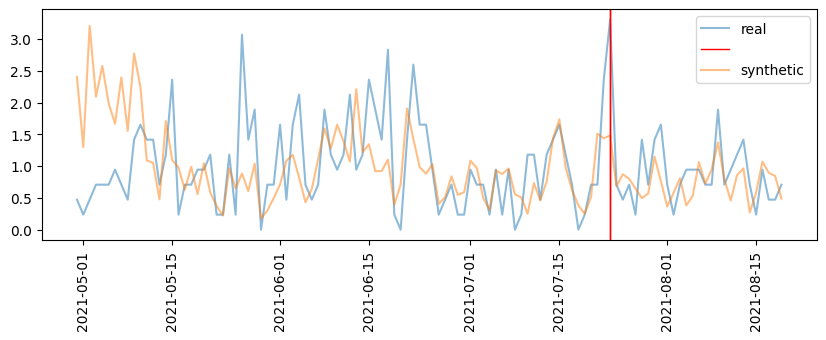

0.5242605645866615 0.16947333527857147


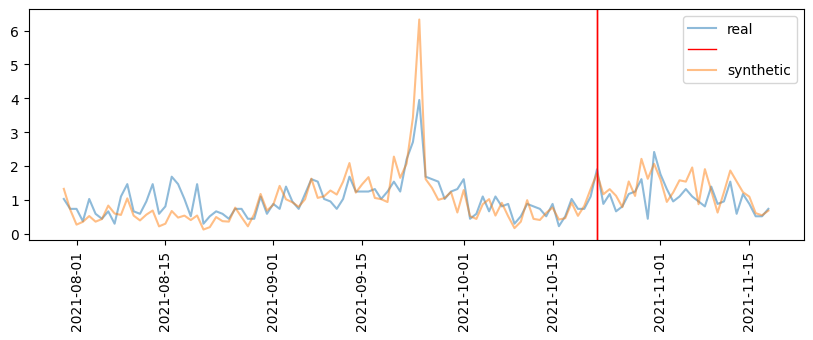

0.46576144336435726 -0.22293077777857143


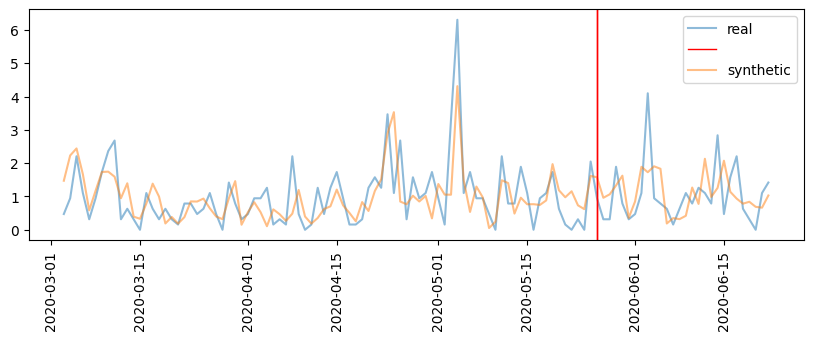

0.8681856463996882 -0.07043979059642855


In [29]:
from protest_impact.synthetic_region import metrics

for i in range(19):
    df0 = pd.DataFrame(json.loads(df["dfs_protest"].iloc[0][i]))
    df0["date"] = pd.to_datetime(df0["date"], unit="ms")
    df0.index = df0.index.astype(int)
    date_ = pd.Timestamp(df["events_protest"].iloc[0][i]["event_date"])
    plot_comparison(df0, date_)
    plt.show()
    m = metrics(df0, date_)
    print(m["rmse"], m["post_diff"].mean())

Weirdly, these seem to be the results even for the protest-focused query. (I mistakenly selected that one.) Now let's compare.

In [41]:
from protest_impact.synthetic_region.hyperopt import get_study_df

df = get_study_df("test_1005")
df = df[df["term"] == "protest_focused"]
df[
    [
        "term",
        "method",
        "standardize",
        "use_autoregressor",
        "socioeconomic_method",
        "rmse_mean",
        "rmse_std",
        "random_post_diff_mean_week_1",
        "random_post_diff_mean",
        "protest_post_diff_mean_week_1",
        "protest_post_diff_mean",
    ]
].sort_values("rmse_mean")

,term,method,standardize,use_autoregressor,socioeconomic_method,rmse_mean,rmse_std,random_post_diff_mean_week_1,random_post_diff_mean,protest_post_diff_mean_week_1,protest_post_diff_mean
53,protest_focused,linear_regression,True,False,NaN,0.522226,0.212318,0.007644,0.055594,-0.162375,-0.075675
36,protest_focused,linear_regression,True,False,NaN,0.527303,0.215937,-0.034379,0.020021,-0.166254,-0.097771
54,protest_focused,linear_regression,True,False,NaN,0.555172,0.287634,0.004865,0.071595,-0.167169,-0.075419
55,protest_focused,linear_regression,True,False,NaN,0.559000,0.290492,-0.038848,0.038744,-0.164677,-0.097990
12,protest_focused,linear_regression,True,True,NaN,0.568861,0.261275,-0.052108,-0.020996,-0.218544,-0.204180
26,protest_focused,linear_regression,True,True,NaN,0.568861,0.261275,-0.052108,-0.020996,-0.218544,-0.204180
43,protest_focused,linear_regression,False,True,NaN,0.613607,0.363345,-0.033800,0.043243,-0.194025,-0.110134
34,protest_focused,linear_regression,True,True,NaN,0.613607,0.363345,-0.033800,0.043243,-0.194025,-0.110134
35,protest_focused,linear_regression,True,True,NaN,0.618875,0.347564,-0.044107,0.024783,-0.215622,-0.113898
0,protest_focused,socioeconomic_weights,True,NaN,similarity,0.624952,0.298520,0.010077,0.035949,-0.106637,-0.036978


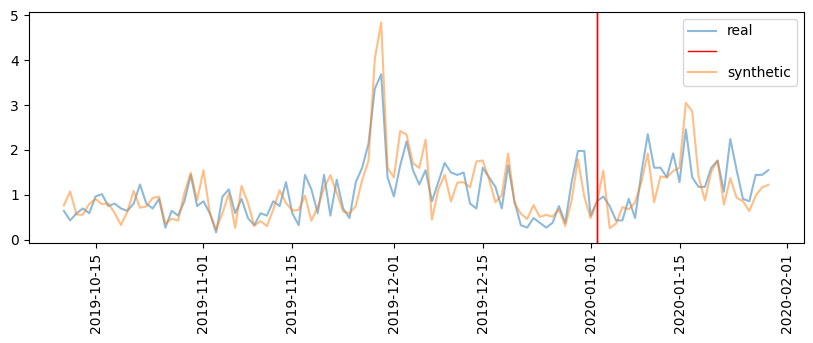

0.4750076637681489 0.08873398802500002


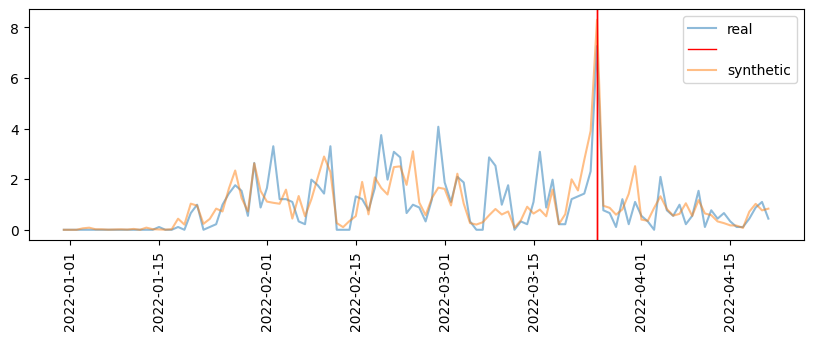

0.5408650907066302 -0.1581849066357143


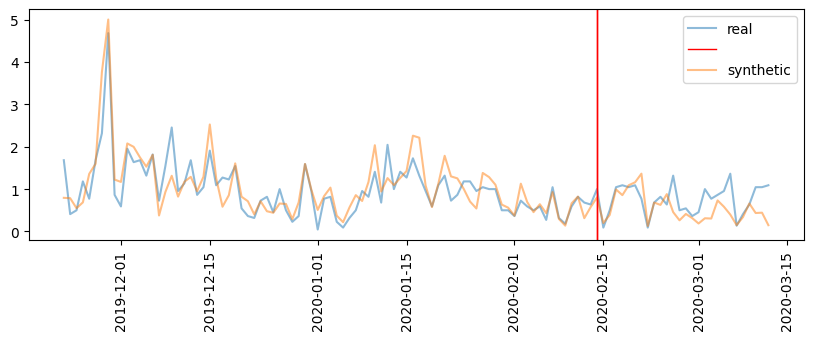

0.4169410841021542 0.21580121566785718


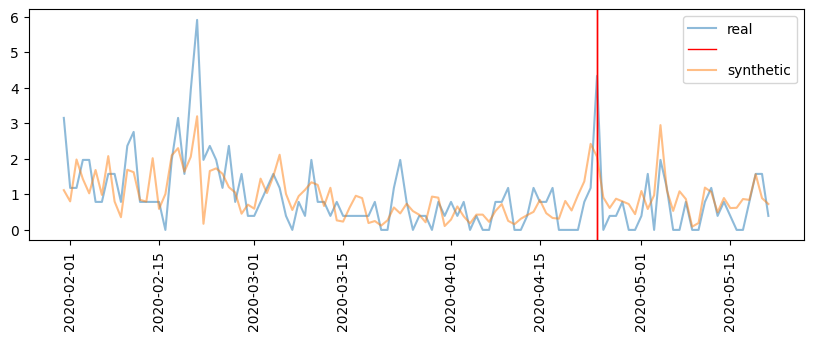

0.7046872869073306 -0.21589154869285712


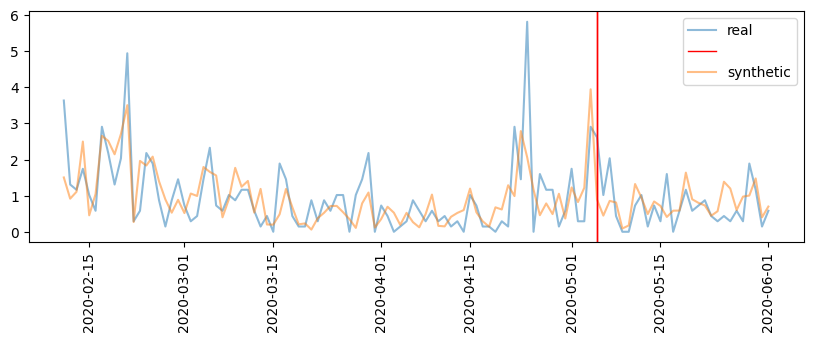

0.6230977241263995 -0.04792752014285713


In [42]:
from protest_impact.synthetic_region import metrics

for i in range(5):
    df0 = pd.DataFrame(json.loads(df["dfs_protest"].iloc[0][i]))
    df0["date"] = pd.to_datetime(df0["date"], unit="ms")
    df0.index = df0.index.astype(int)
    date_ = pd.Timestamp(df["events_protest"].iloc[0][i]["event_date"])
    plot_comparison(df0, date_)
    plt.show()
    m = metrics(df0, date_)
    print(m["rmse"], m["post_diff"].mean())

In [43]:
from protest_impact.synthetic_region.hyperopt import get_study_df

df = get_study_df("test_1005")
df = df[df["term"] == "topic_focused"]
df[
    [
        "term",
        "method",
        "standardize",
        "use_autoregressor",
        "socioeconomic_method",
        "rmse_mean",
        "rmse_std",
        "random_post_diff_mean_week_1",
        "random_post_diff_mean",
        "protest_post_diff_mean_week_1",
        "protest_post_diff_mean",
    ]
].sort_values("rmse_mean")

,term,method,standardize,use_autoregressor,socioeconomic_method,rmse_mean,rmse_std,random_post_diff_mean_week_1,random_post_diff_mean,protest_post_diff_mean_week_1,protest_post_diff_mean
33,topic_focused,linear_regression,True,True,NaN,0.298026,0.054484,-0.044538,-0.004141,-0.061713,-0.022021
47,topic_focused,linear_regression,True,True,NaN,0.298026,0.054484,-0.044538,-0.004141,-0.061713,-0.022021
45,topic_focused,linear_regression,False,False,NaN,0.301152,0.069298,0.003252,0.030340,-0.033776,0.006994
52,topic_focused,linear_regression,True,False,NaN,0.301152,0.069298,0.003252,0.030340,-0.033776,0.006994
48,topic_focused,linear_regression,True,False,NaN,0.303233,0.067365,-0.005672,0.022449,-0.024138,0.001556
51,topic_focused,linear_regression,True,False,NaN,0.303233,0.067365,-0.005672,0.022449,-0.024138,0.001556
18,topic_focused,linear_regression,False,False,NaN,0.303233,0.067365,-0.005672,0.022449,-0.024138,0.001556
44,topic_focused,linear_regression,False,True,NaN,0.306794,0.055958,-0.060359,-0.024295,-0.068996,-0.021670
30,topic_focused,linear_regression,True,True,NaN,0.306794,0.055958,-0.060359,-0.024295,-0.068996,-0.021670
49,topic_focused,linear_regression,True,False,NaN,0.307650,0.064428,-0.022306,0.001224,-0.041035,0.004704


1.0646471904774606


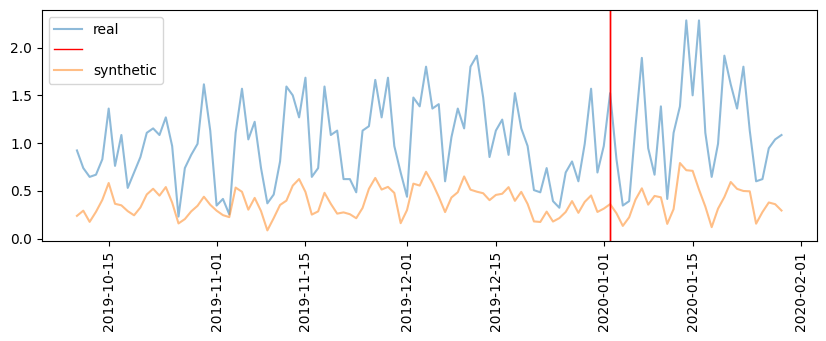

0.8850722720090262 0.7821913550749999
1.0646471904774606


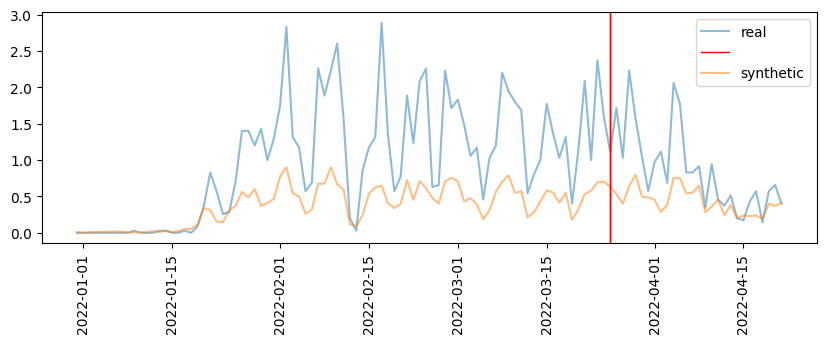

0.6020074868095682 0.4245422666464286
1.0646471904774606


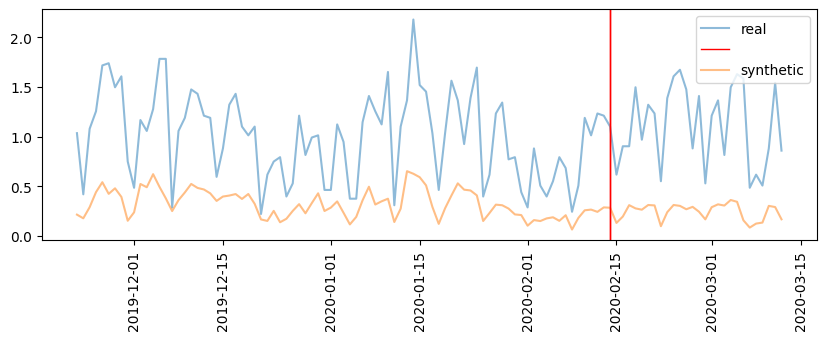

0.9275692055429648 0.8630704096321428
1.0646471904774606


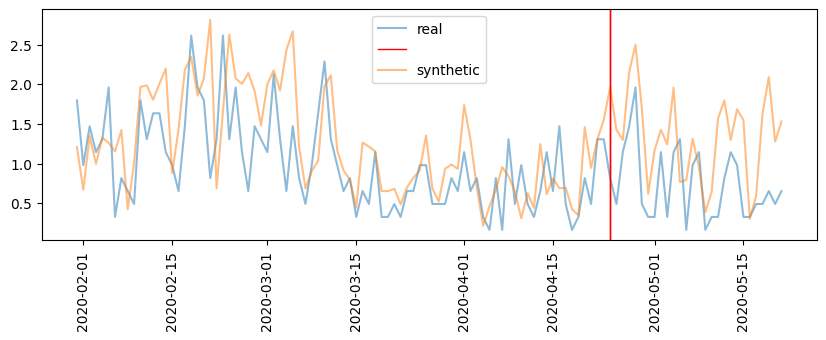

0.7803437096764255 -0.6140728356464287
1.0646471904774606


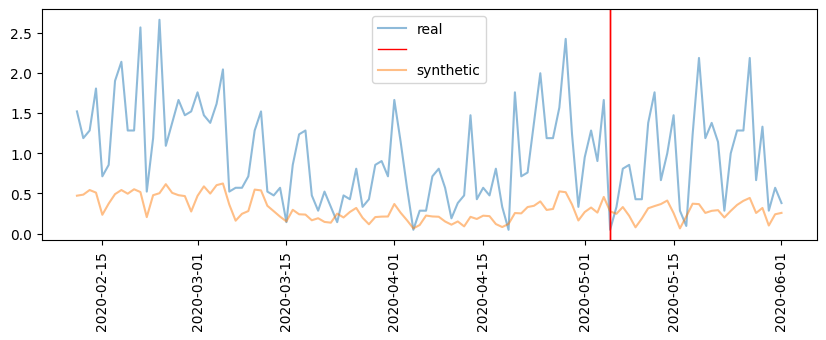

0.8325168337757486 0.6509064385999999


In [51]:
from protest_impact.synthetic_region import metrics

x = 0

for i in range(5):
    print(df["rmse_mean"].iloc[x])
    df0 = pd.DataFrame(json.loads(df["dfs_protest"].iloc[x][i]))
    df0["date"] = pd.to_datetime(df0["date"], unit="ms")
    df0.index = df0.index.astype(int)
    date_ = pd.Timestamp(df["events_protest"].iloc[x][i]["event_date"])
    plot_comparison(df0, date_)
    plt.show()
    m = metrics(df0, date_)
    print(m["rmse"], m["post_diff"].mean())

These bad results are because mean and weighted methods always require standardization. Fixed this in hyperopt.py.

In [86]:
from protest_impact.synthetic_region.hyperopt import get_study_df

df = get_study_df("test_1006")
df = df[df["term"] == "topic_focused"]
df[
    [
        "term",
        "method",
        "standardize",
        "use_autoregressor",
        "socioeconomic_method",
        "rmse_mean",
        "rmse_std",
        "random_post_diff_mean_week_1",
        "random_post_diff_mean",
        "protest_post_diff_mean_week_1",
        "protest_post_diff_mean",
    ]
].sort_values("rmse_mean")

,term,method,standardize,use_autoregressor,socioeconomic_method,rmse_mean,rmse_std,random_post_diff_mean_week_1,random_post_diff_mean,protest_post_diff_mean_week_1,protest_post_diff_mean
10,topic_focused,linear_regression,True,True,NaN,0.298026,0.054484,-0.044538,-0.004141,-0.061713,-0.022021
17,topic_focused,linear_regression,False,True,NaN,0.337083,0.059132,-0.050386,-0.020069,-0.086472,-0.032292
1,topic_focused,distance_weights,True,NaN,NaN,0.353695,0.072057,-0.006032,0.022853,-0.068969,-0.004546
3,topic_focused,distance_weights,True,NaN,NaN,0.353695,0.072057,-0.006032,0.022853,-0.068969,-0.004546
6,topic_focused,mean,True,NaN,NaN,0.377075,0.084875,0.032390,0.042951,-0.056509,0.008931


But the weird thing that both protest-focused and topic-focused discourse goes down remains.

In [92]:
from protest_impact.synthetic_region.hyperopt import get_study_df

df = get_study_df("test_753")
df = df[df["event_type"] == "protest"]
df = df[df["term"] == "topic_focused"]
df[
    [
        "event_type",
        "term",
        "method",
        "standardize",
        "use_autoregressor",
        "readjust",
        # "socioeconomic_method",
        # "rmse_test_mean",
        # "rmse_test_std",
        "rmse_dev_mean",
        "rmse_dev_std",
        "impact_1_days_mean",
        "impact_1_days_std",
        "impact_7_days_mean",
        "impact_7_days_std",
        "impact_14_days_mean",
        "impact_14_days_std",
    ]
].sort_values("rmse_dev_mean")

,event_type,term,method,standardize,use_autoregressor,readjust,rmse_dev_mean,rmse_dev_std,impact_1_days_mean,impact_1_days_std,impact_7_days_mean,impact_7_days_std,impact_14_days_mean,impact_14_days_std
40,protest,topic_focused,ridge,True,False,NaN,0.325266,0.110670,-0.009242,13.693117,-0.809467,5.683572,-0.474154,6.045577
2,protest,topic_focused,lasso,True,False,False,0.327582,0.113547,0.040632,13.530605,-0.815495,5.650358,-0.473478,6.055540
61,protest,topic_focused,lasso,False,False,False,0.334047,0.114337,0.046309,13.762260,-0.751220,5.707059,-0.498740,6.127680
5,protest,topic_focused,ridge,False,False,NaN,0.336689,0.115262,-0.056764,13.746281,-0.762919,5.711805,-0.523995,6.141024
59,protest,topic_focused,lasso,False,True,False,0.340211,0.122136,0.075844,13.061268,-1.862063,5.808609,-1.188797,6.338882
60,protest,topic_focused,linear_regression,False,False,NaN,0.342659,0.125922,0.581046,13.681579,-0.465981,5.635586,-0.446570,6.307184
58,protest,topic_focused,random_forest,False,False,NaN,0.361600,0.155225,1.507564,13.860685,-0.480266,5.325106,0.392486,5.383142
49,protest,topic_focused,random_forest,True,False,NaN,0.376965,0.157898,0.826440,16.690469,-0.762224,4.810713,0.356511,5.186531
46,protest,topic_focused,random_forest,False,False,NaN,0.377315,0.160145,1.321777,13.675047,-0.505172,5.488928,0.215840,5.424391
37,protest,topic_focused,mean,True,NaN,NaN,0.397555,0.131844,1.180681,16.570051,-0.846258,7.217973,0.105476,6.407252


number                                                                   2
value                                                             0.327582
datetime_start                                  2023-04-25 13:39:34.355996
datetime_complete                               2023-04-25 13:40:07.715257
duration                                            0 days 00:00:33.359261
                                               ...                        
rmses_dev                [0.24082464867877834, 0.27865191076653323, 0.2...
sample_size_effective                                                 20.0
seed                                                            20230413.0
start_date                                                      2020-01-01
state                                                             COMPLETE
Name: 2, Length: 64, dtype: object


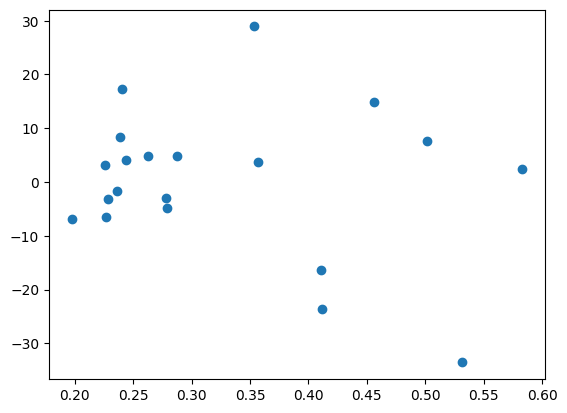

In [88]:
x = 0
print(df.iloc[x])
plt.scatter(df.iloc[x]["rmses_dev"], df.iloc[x]["impact_1_days"])

In [89]:
# import pandas as pd
# import json
# from protest_impact.data.discourse.visual import plot_comparison
# dfs = [pd.DataFrame(json.loads(d)) for d in df.loc[17]["dfs"]]
# for df0 in dfs:
#     df0.index = pd.to_datetime(df0.index, unit="ms")
#     plot_comparison(df0)
#     plt.show()

In [90]:
l = len(df.iloc[0]["rmses_dev"])
l

20

2020-01-02 00:00:00
2020-01-02 00:00:00
2020-01-02 00:00:00
2020-01-02 00:00:00
2020-01-02 00:00:00
2020-01-02 00:00:00
2020-01-02 00:00:00
2020-01-02 00:00:00
2020-01-02 00:00:00
2020-01-02 00:00:00
2020-01-02 00:00:00
2020-01-02 00:00:00
2020-01-02 00:00:00
2020-01-02 00:00:00
2020-01-02 00:00:00
2020-01-02 00:00:00


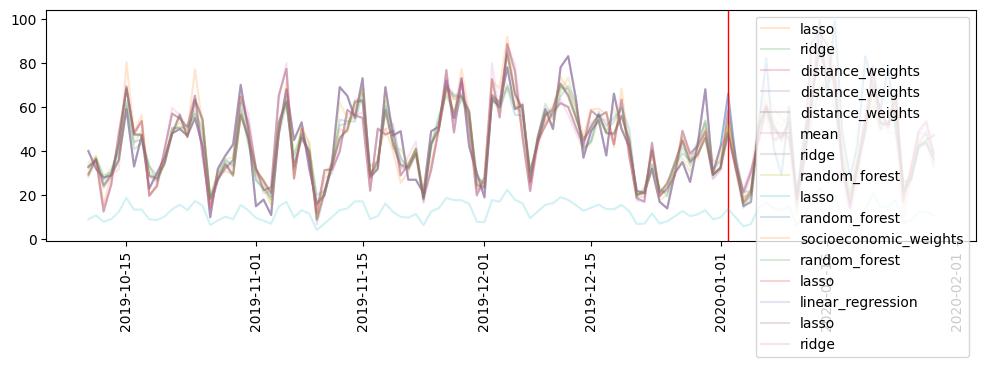

2022-03-25 00:00:00
2022-03-25 00:00:00
2022-03-25 00:00:00
2022-03-25 00:00:00
2022-03-25 00:00:00
2022-03-25 00:00:00
2022-03-25 00:00:00
2022-03-25 00:00:00
2022-03-25 00:00:00
2022-03-25 00:00:00
2022-03-25 00:00:00
2022-03-25 00:00:00
2022-03-25 00:00:00
2022-03-25 00:00:00
2022-03-25 00:00:00
2022-03-25 00:00:00


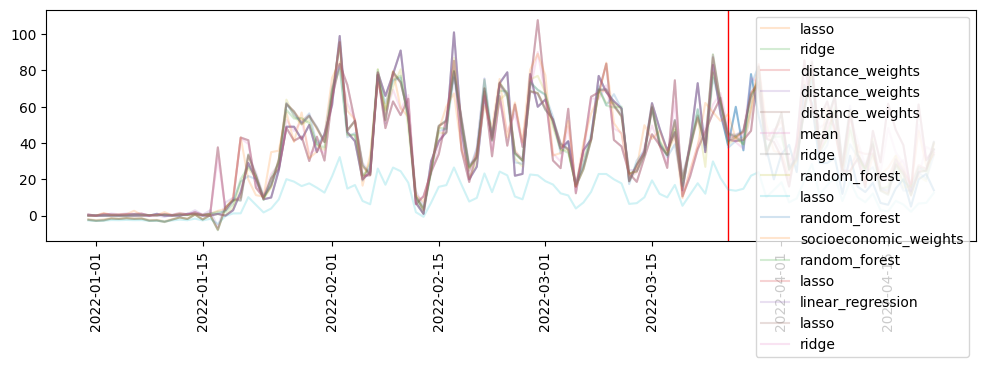

2020-02-14 00:00:00
2020-02-14 00:00:00
2020-02-14 00:00:00
2020-02-14 00:00:00
2020-02-14 00:00:00
2020-02-14 00:00:00
2020-02-14 00:00:00
2020-02-14 00:00:00
2020-02-14 00:00:00
2020-02-14 00:00:00
2020-02-14 00:00:00
2020-02-14 00:00:00
2020-02-14 00:00:00
2020-02-14 00:00:00
2020-02-14 00:00:00
2020-02-14 00:00:00


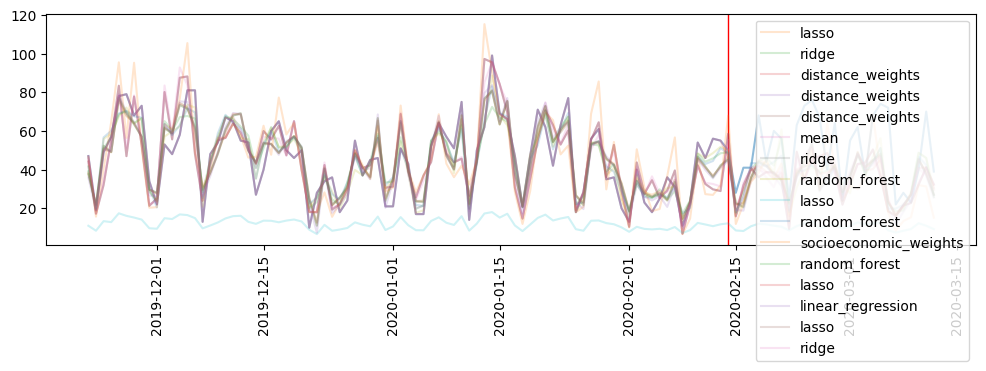

2020-04-24 00:00:00
2020-04-24 00:00:00
2020-04-24 00:00:00
2020-04-24 00:00:00
2020-04-24 00:00:00
2020-04-24 00:00:00
2020-04-24 00:00:00
2020-04-24 00:00:00
2020-04-24 00:00:00
2020-04-24 00:00:00
2020-04-24 00:00:00
2020-04-24 00:00:00
2020-04-24 00:00:00
2020-04-24 00:00:00
2020-04-24 00:00:00
2020-04-24 00:00:00


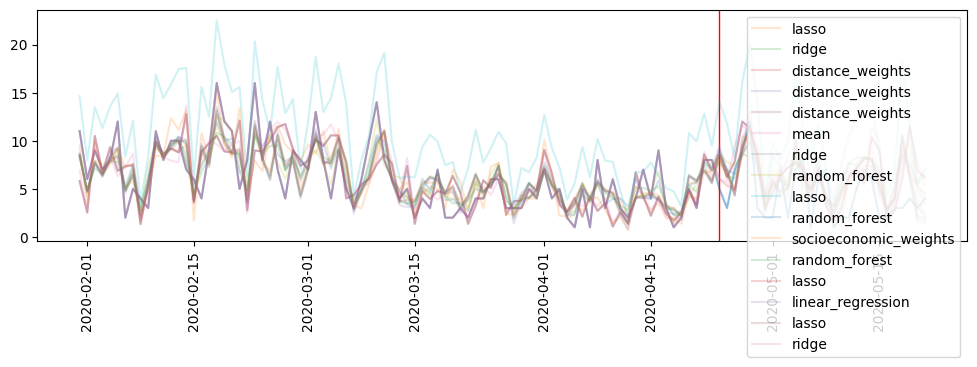

In [91]:
from protest_impact.data.discourse.visual import plot_coverage_sequence

for i in range(4):  # range(l):
    # plot the true time series of the df
    dfi = pd.DataFrame(json.loads(df.iloc[0]["dfs"][i]))
    dfi.index = pd.to_datetime(dfi.index, unit="ms")
    date_ = pd.Timestamp(df.iloc[0]["events"][i]["event_date"])
    fig, ax = plt.subplots(figsize=(12, 3))
    plot_coverage_sequence(
        dfi.rename(columns={"true": "count"}), protest_date=date_, ax=ax
    )
    # for each method, print the rmse_dev and the impact for 1, 3, 7, 14 days
    for j in df.index:
        # print(df.loc[j]["method"], df.loc[j]["rmses_dev"][i], df.loc[j]["impact_1_days"][i])
        date__ = pd.Timestamp(df.loc[j]["events"][i]["event_date"])
        print(date__)
        # add the predicted time series to the plot
        dfij = pd.DataFrame(json.loads(df.loc[j]["dfs"][i]))
        dfij.index = pd.to_datetime(dfij.index, unit="ms")
        plot_coverage_sequence(
            dfij.rename(columns={"synth": "count"}),
            ax=ax,
            label=df.loc[j]["method"],
            alpha=0.2,
        )
    plt.legend()
    plt.show()

In [94]:
data = []
for i, row in enumerate(df.to_dict(orient="records")):
    for j in range(20):
        data.append(
            dict(
                method=i,
                event=j,
                rmse=row["rmses_dev"][j],
                impact=row["impact_1_days"][j],
            )
        )
df = pd.DataFrame(data)
df

,method,event,rmse,impact
0,0,0,0.240825,17.275456
1,0,1,0.278652,-4.809289
2,0,2,0.225926,3.133378
3,0,3,0.277877,-3.030867
4,0,4,0.410769,-16.361501
...,...,...,...,...
315,15,15,0.183012,-10.929255
316,15,16,0.232401,-4.525675
317,15,17,0.238810,7.718271
318,15,18,0.649942,-1.937404


<Axes: xlabel='rmse', ylabel='impact'>

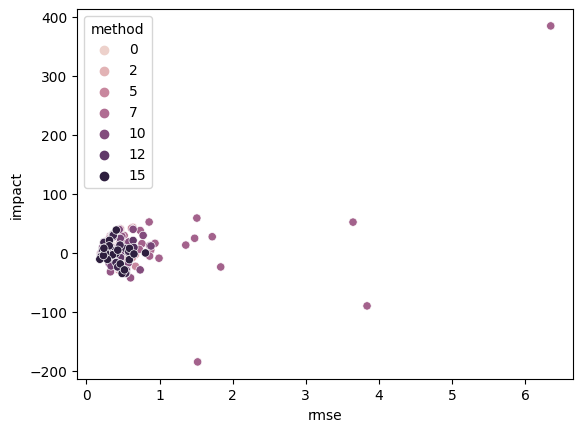

In [95]:
# scatterplot of rmse vs impact
# for each event
# with error bars for both axes (std of rmse and impact)

import seaborn as sns

sns.scatterplot(data=df, x="rmse", y="impact", hue="method")

<Axes: xlabel='rmse', ylabel='impact'>

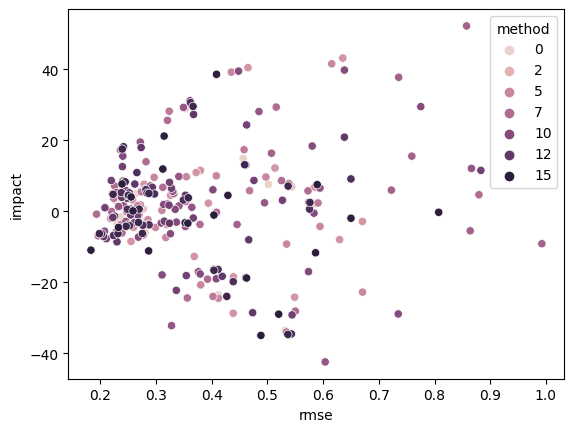

In [98]:
df_ = df[df["rmse"] < 1]
sns.scatterplot(data=df_, x="rmse", y="impact", hue="method")

Now using relative impacts rather than absolute:

In [116]:
from protest_impact.synthetic_region.hyperopt import get_study_df

df = get_study_df("test_333")
df = df[df["event_type"] == "protest"]
df = df[df["term"] == "topic_focused"]
df[
    [
        "event_type",
        "term",
        "method",
        "standardize",
        "use_autoregressor",
        "readjust",
        # "socioeconomic_method",
        # "rmse_test_mean",
        # "rmse_test_std",
        "rmse_dev_mean",
        "rmse_dev_std",
        "impact_1_days_mean",
        "impact_1_days_std",
        "impact_7_days_mean",
        "impact_7_days_std",
        "impact_14_days_mean",
        "impact_14_days_std",
    ]
].sort_values("rmse_dev_mean")

,event_type,term,method,standardize,use_autoregressor,readjust,rmse_dev_mean,rmse_dev_std,impact_1_days_mean,impact_1_days_std,impact_7_days_mean,impact_7_days_std,impact_14_days_mean,impact_14_days_std
56,protest,topic_focused,lasso,False,False,False,0.323002,0.107796,-0.020010,0.364228,-0.039712,0.149165,-0.011675,0.156736
61,protest,topic_focused,linear_regression,True,False,NaN,0.323724,0.108456,-0.024245,0.366122,-0.041035,0.150037,-0.013070,0.156947
19,protest,topic_focused,linear_regression,True,False,NaN,0.323724,0.108456,-0.024245,0.366122,-0.041035,0.150037,-0.013070,0.156947
54,protest,topic_focused,ridge,True,False,NaN,0.325266,0.110670,-0.024336,0.366334,-0.034425,0.146656,-0.012524,0.156811
43,protest,topic_focused,ridge,True,False,NaN,0.325266,0.110670,-0.024336,0.366334,-0.034425,0.146656,-0.012524,0.156811
63,protest,topic_focused,linear_regression,True,False,NaN,0.326698,0.109083,-0.010468,0.373333,-0.033776,0.152772,-0.012072,0.160239
29,protest,topic_focused,linear_regression,True,False,NaN,0.326698,0.109083,-0.010468,0.373333,-0.033776,0.152772,-0.012072,0.160239
1,protest,topic_focused,ridge,False,False,NaN,0.336689,0.115262,-0.024258,0.365799,-0.032349,0.144594,-0.013336,0.157133
52,protest,topic_focused,linear_regression,True,False,NaN,0.337444,0.115637,-0.024804,0.365663,-0.032298,0.144584,-0.013478,0.157164
32,protest,topic_focused,linear_regression,True,False,NaN,0.337444,0.115637,-0.024804,0.365663,-0.032298,0.144584,-0.013478,0.157164


In [117]:
len(df)

43

In [118]:
data = []
for i, row in enumerate(df.to_dict(orient="records")):
    for j in range(20):
        data.append(
            dict(
                method=i,
                event=j,
                rmse=row["rmses_dev"][j],
                impact=row["impact_1_days"][j],
            )
        )
df = pd.DataFrame(data)
df

,method,event,rmse,impact
0,0,0,0.239473,0.388813
1,0,1,0.280176,-0.173009
2,0,2,0.224816,0.106114
3,0,3,0.273217,-0.603941
4,0,4,0.407969,-0.777939
...,...,...,...,...
855,42,15,0.197935,-0.285112
856,42,16,0.230963,-0.181724
857,42,17,0.258783,0.326627
858,42,18,0.553322,-0.033294


<Axes: xlabel='rmse', ylabel='impact'>

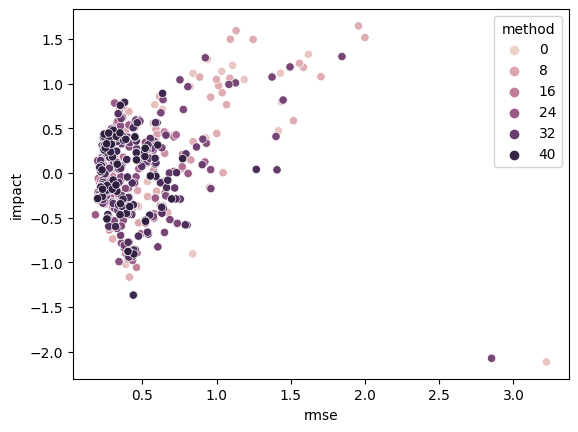

In [119]:
sns.scatterplot(data=df, x="rmse", y="impact", hue="method")

In [106]:
df_mean = df.groupby("method").mean()
df_std = df.groupby("method").std()

<ErrorbarContainer object of 3 artists>

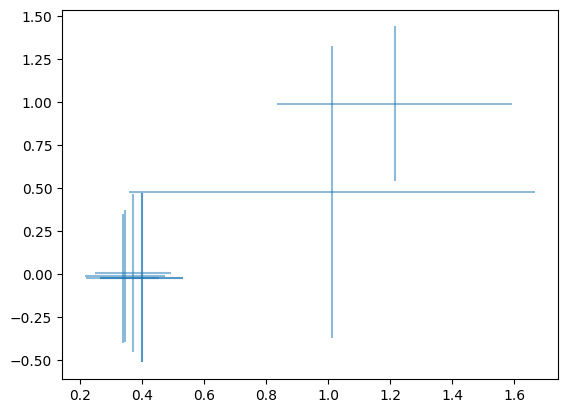

In [109]:
# plt.scatter(df_mean["rmse"], df_mean["impact"])
plt.errorbar(
    df_mean["rmse"],
    df_mean["impact"],
    xerr=df_std["rmse"],
    yerr=df_std["impact"],
    fmt="none",
    alpha=0.5,
)

<ErrorbarContainer object of 3 artists>

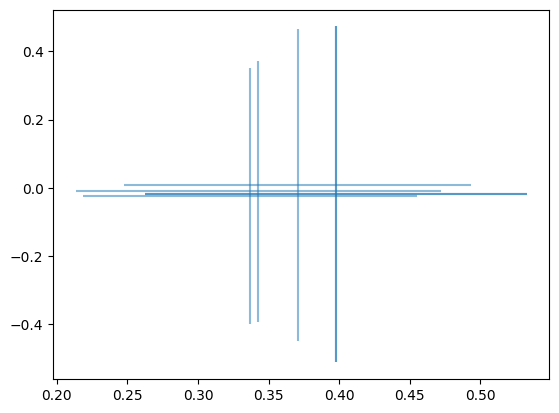

In [110]:
df_mean_ = df_mean[df_mean["rmse"] < 1]
df_std_ = df_std[df_mean["rmse"] < 1]
plt.errorbar(
    df_mean_["rmse"],
    df_mean_["impact"],
    xerr=df_std_["rmse"],
    yerr=df_std_["impact"],
    fmt="none",
    alpha=0.5,
)

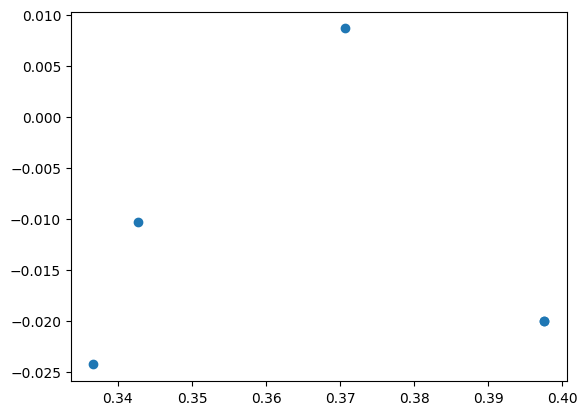

In [111]:
plt.scatter(df_mean_["rmse"], df_mean_["impact"])